<a href="https://colab.research.google.com/github/Ranger3560/studious-train-salary/blob/main/Motor_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Install pandas if it's not already installed
try:
    import pandas
except ImportError:
    %pip install pandas
    import pandas

# Load the uploaded CSV file
file_path = '/content/final_motor_insurance_data.csv'
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully! Here are the first 5 rows:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure it is uploaded.")
except Exception as e:
    print(f"An error occurred while loading the file: {e}")

File loaded successfully! Here are the first 5 rows:
  financial_year           insurer  motor_od_gdp  motor_tp_gdp  \
0        2016-17     Bajaj Allianz        2066.0        1501.0   
1        2016-17        Bharti Axa         741.0         364.0   
2        2016-17  Cholamandalam MS         922.0        1243.0   
3        2016-17   Future Generali         545.0         358.0   
4        2016-17         HDFC Ergo         941.0         661.0   

   total_motor_gdp  total_gdp  
0           3567.0     7633.0  
1           1105.0     1314.0  
2           2165.0     3133.0  
3            903.0     1815.0  
4           1601.0     5840.0  


In [3]:
highest_gdp_insurer = df.loc[df['total_motor_gdp'].idxmax()]
print("Insurer with the highest total motor GDP:")
print(highest_gdp_insurer[['insurer', 'total_motor_gdp']])

Insurer with the highest total motor GDP:
insurer            New India Assurance
total_motor_gdp                9094.89
Name: 33, dtype: object


In [6]:
# Calculate the ratio of total_motor_gdp to total_gdp
df['gdp_ratio'] = df['total_motor_gdp'] / df['total_gdp']

# Filter for insurers where total_motor_gdp is at least 70% of total_gdp
insurers_70_percent_gdp = df[df['gdp_ratio'] >= 0.7]

print("Insurers whose total motor GDP is at least 70% of total GDP:")
if not insurers_70_percent_gdp.empty:
    print(insurers_70_percent_gdp[['insurer', 'financial_year', 'total_motor_gdp', 'total_gdp', 'gdp_ratio']].sort_values(by='gdp_ratio', ascending=False))
else:
    print("No insurers found where total motor GDP is at least 70% of total GDP.")

Insurers whose total motor GDP is at least 70% of total GDP:
              insurer financial_year  total_motor_gdp  total_gdp  gdp_ratio
39    Shriram General        2017-18          2040.59    2100.76   0.971358
89    Shriram General        2019-20          2381.56    2466.19   0.965684
114   Shriram General        2020-21          2049.24    2138.88   0.958090
64    Shriram General        2018-19          2252.45    2356.34   0.955910
50           Go Digit        2018-19           854.53     894.82   0.954974
75           Go Digit        2019-20          1649.51    1767.86   0.933055
138   Shriram General        2021-22          1629.38    1752.95   0.929507
161   Shriram General        2022-23          2085.21    2265.78   0.920306
18    Shriram General        2016-17          1836.00    2102.00   0.873454
8      Kotak Mahindra        2016-17            69.00      82.00   0.841463
1          Bharti Axa        2016-17          1105.00    1314.00   0.840944
81          Magma HDI      

In [8]:
print("Summary statistics for insurers where total motor GDP is at least 70% of total GDP:")
display(insurers_70_percent_gdp.describe())

Summary statistics for insurers where total motor GDP is at least 70% of total GDP:


,motor_od_gdp,motor_tp_gdp,total_motor_gdp,total_gdp,gdp_ratio
count,32.000000,32.000000,32.000000,32.000000,32.000000
mean,601.394688,1055.035938,1656.399063,2091.280937,0.808453
std,406.693556,702.012118,1021.771872,1414.831772,0.093643
min,45.000000,24.000000,69.000000,82.000000,0.701071
25%,272.965000,596.872500,940.037500,1161.105000,0.733410
50%,535.935000,1007.925000,1770.000000,2101.380000,0.775450
75%,993.472500,1483.650000,2058.232500,2556.450000,0.885167
max,1675.200000,2669.920000,4345.120000,6155.990000,0.971358


In [7]:
shriram_general_gdp = df[df['insurer'] == 'Shriram General'][['financial_year', 'total_motor_gdp', 'total_gdp']]
print("Total motor GDP versus Total GDP for Shriram General:")
print(shriram_general_gdp.sort_values(by='financial_year'))

Total motor GDP versus Total GDP for Shriram General:
    financial_year  total_motor_gdp  total_gdp
18         2016-17          1836.00    2102.00
39         2017-18          2040.59    2100.76
64         2018-19          2252.45    2356.34
89         2019-20          2381.56    2466.19
114        2020-21          2049.24    2138.88
138        2021-22          1629.38    1752.95
161        2022-23          2085.21    2265.78


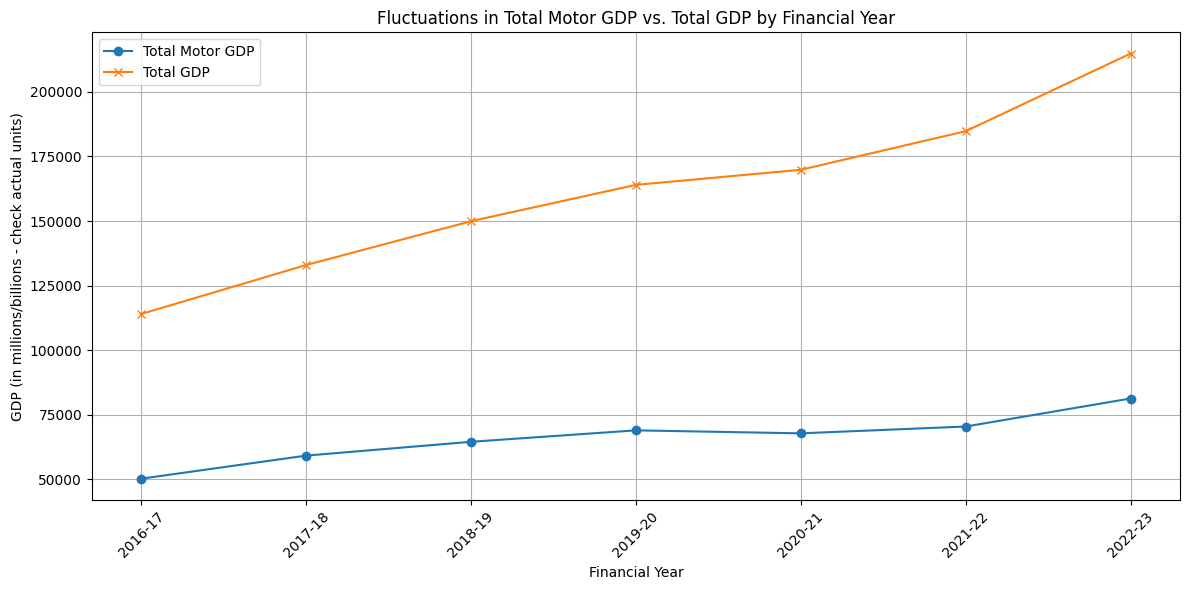

In [9]:
import matplotlib.pyplot as plt

# Aggregate total_motor_gdp and total_gdp by financial_year
gdp_by_year = df.groupby('financial_year')[['total_motor_gdp', 'total_gdp']].sum().reset_index()

# Plot the fluctuations
plt.figure(figsize=(12, 6))
plt.plot(gdp_by_year['financial_year'], gdp_by_year['total_motor_gdp'], marker='o', label='Total Motor GDP')
plt.plot(gdp_by_year['financial_year'], gdp_by_year['total_gdp'], marker='x', label='Total GDP')

plt.title('Fluctuations in Total Motor GDP vs. Total GDP by Financial Year')
plt.xlabel('Financial Year')
plt.ylabel('GDP (in millions/billions - check actual units)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()